# Programming problem set 5

The goal of this problem set is to use our random walk simulation from Tutorial 4 and visualize the Gaussian behavior of the distribution of positions occupied by walkers at specific times.

# Import modules

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# plt.style.use('custom.mplstyle')
%config InlineBackend.figure_format = 'retina'

# Set up the random number generator

In [16]:
rng = np.random.default_rng(seed=0)

# Random walk simulation

The random walk simulation from Tutorial 4 is recreated below for ease of use. A docstring is also provided to recall what the function is doing, what are its parameters, and what it returns. If you'd like more details about what the function is doing at each step, see the comments in the solution to Tutorial 4. Additionally, it's very helpful to test out each line of code yourself.

In [17]:
def generate_random_walks(rng, p, num_steps, num_walks, initial_positions):
    """
    Simulate random walk experiments.
    
    Parameters
    ----------
    rng : np.random.Generator
        A random number generator.
    p : float
        The probability of observing a heads (and the walker moving one step
        to the right.)
    num_steps : int
        The number of steps each random walk should have.
    num_walks : int
        The number of random walk experiments to conduct.
    initial_positions : numpy.ndarray
        A one-dimensional numpy array specifying the starting positions
        of the experiments.
    
    Returns
    -------
    walks : numpy.ndarray
        A two dimensional array whose rows represent independent random walk
        experiments and whose columns are the positions of the walkers at
        each time step.
    """
    rands = rng.random(size=(num_walks, num_steps))
    
    movements = np.ones(shape=(num_walks, num_steps))
    movements[rands > p] = -1
    
    walks = np.zeros(shape=(num_walks, num_steps + 1))
    walks[:, 0] = initial_positions
    walks[:, 1:] = movements
    walks = np.cumsum(walks, axis=1)
    
    return walks

### Warm-up: Run your function using a fair coin, `num_steps=1000`, `num_walks=5000`, and all initial positions at the origin. Plot $\mathrm{var}(x(t))$ vs. $t$.

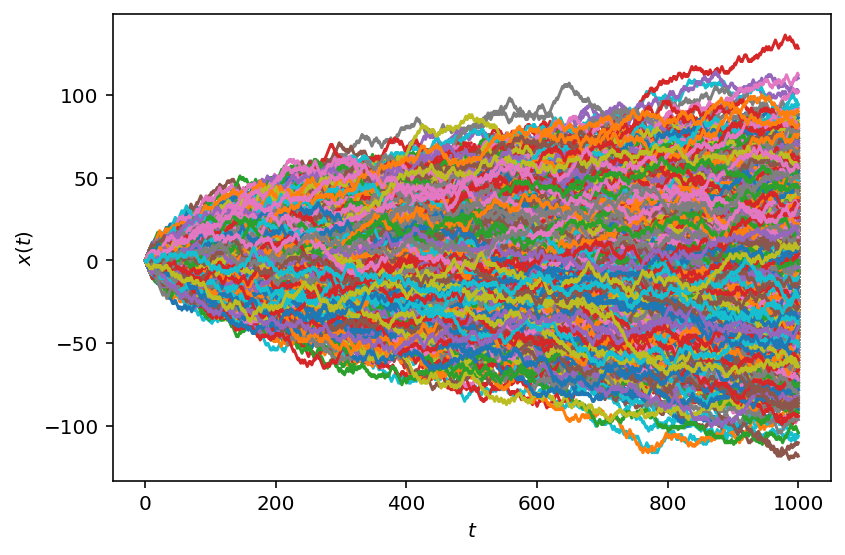

In [18]:
"""
Run the simulation with those parameters.
"""
p = 0.5
num_steps = 1000
num_walks = 5000
initial_positions = np.zeros(shape=num_walks)
walks = generate_random_walks(rng, p, num_steps, num_walks, initial_positions)

# Use this as your x-variable when plotting.
times = np.arange(num_steps + 1)

fig, ax = plt.subplots()
"""
Use a for loop and plot each random walk using ax.plot
"""
for i in range(num_walks):
    ax.plot(times, walks[i])
    
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
fig.tight_layout()
plt.show()

### Question 1: Compute a linear fit for $\mathrm{var}(x(t))$ versus $t$ and obtain the fit parameters. (2 pts)

slope: 1.0040045434164977, intercept: -0.3107319144424242


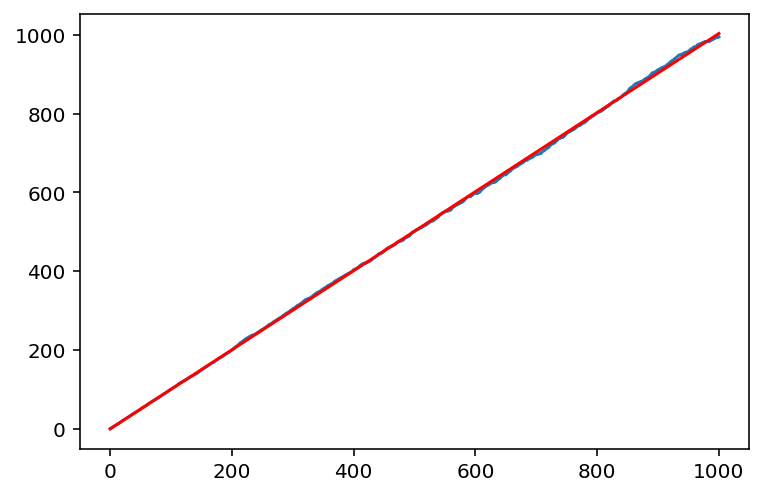

In [19]:
var_xt = np.var(walks, axis=0)
plt.plot(times, var_xt)

para = np.polyfit(times,var_xt,1)
#output
y2 = [] 
for i in range(len(times)):
  y2.append(para[0] * times[i] + para[1] )

print(f"slope: {para[0]}, intercept: {para[1]}")
# fitting results
plt.plot(times,y2,'r')
plt.show()

### Question 2: Using the slope from Q1, estimate the diffusion coefficient $D$ for the random walks. (3 pts)
**Hint:** remind yourself of the relationship between variance, time, and the diffusion coefficient.

**Answer for Q2:**
Since var(x(t)) = 2Dt, the diffusion coefficient D = 1/2 * slope = 0.5




### Question 3: From lecture and the text, we've seen that the positions of diffusing particles at time $t$ is Gaussian distributed, parametrized as, 

$$
p(x, t) = \frac{1}{\sqrt{4 \pi D t}} \exp \left[\frac{-x^2}{4 D t} \right]
$$

### where $D$ is the diffusion constant. Run your function [`generate_random_walks`] using a fair coin, `num_steps=1000`, `num_walks=10000`, and all initial positions at the origin. Plot the distributions of random walk positions at times $t \in \{2, 5, 10, 50, 100, 1000\}$ using normalized histograms. For each of these distributions, *draw* a Gaussian distribution (expression above) using your analytical estimates for the mean and the variance with an orange solid line. Label the axes appropriately. Display a legend. Title each plot with its respective $t$. Set the y-axis limits to be $(0, 0.3)$. (15 pts)

An example plot could appear as:

![](pset4_example_plot.png)

<span style="background-color: #FFFF00"> To draw a Gaussian distribution, first detemrine the mean and the variance (from lecture, Tutorial 4, or use the solution in Q2 for variance). Then use the analytical expression for the Gaussian distribution with the set mean and variance to characterize the function. 
   
### Note:
Making histograms is tricky. You have to choose the correct bins. Before making each histogram do the following to create the correct bins. Calculate the maximum $|x(t)|$ occupied at the time step being plotted. You should make use of [`np.abs`](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html) and [`np.max`](https://numpy.org/doc/stable/reference/generated/numpy.maximum.html). Set this value to a variable called `binmax`. When calling `ax.hist` use the keyword `bins=np.arange(-binmax - 1, binmax + 3, 2)`

Hint: we can use the scipy function `norm.pdf(x, mean, std)` to get values for the Gaussian probability density function. Let `x` be `np.linspace(-binmax, binmax, 30)`, `mean` be your value for the mean, and `std` be your value for the standard deviation.

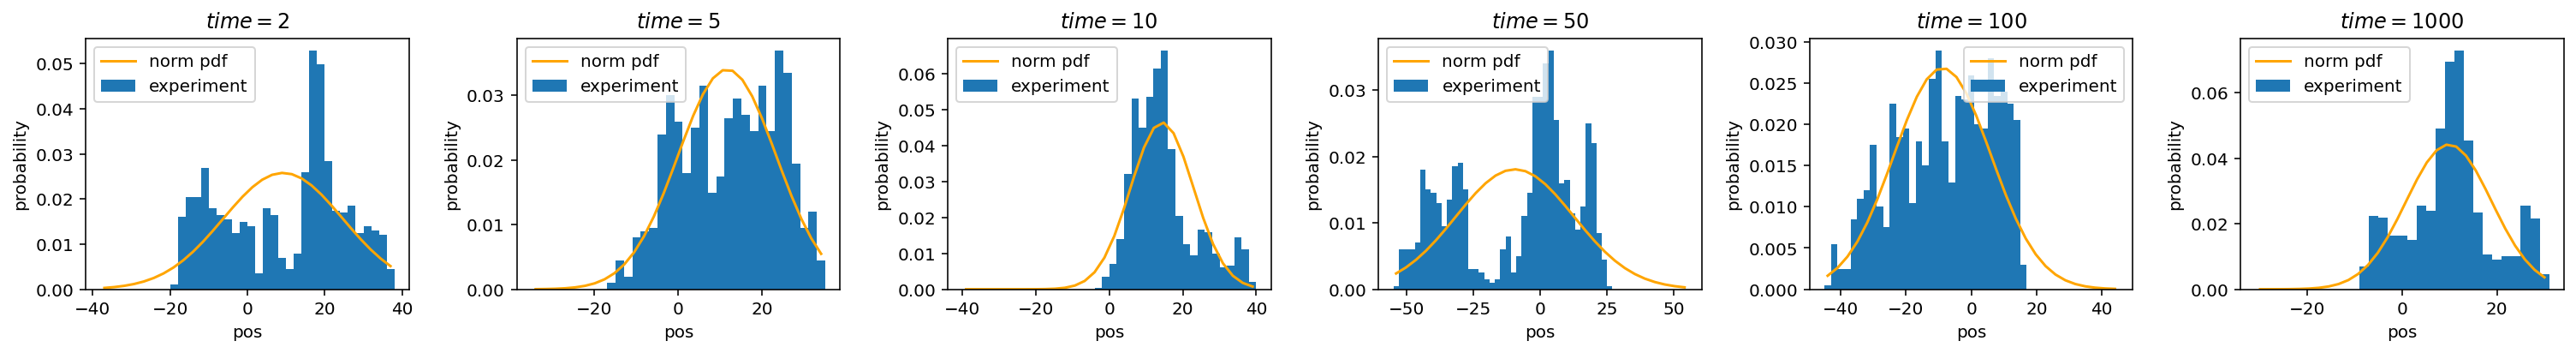

In [31]:
from scipy.stats import norm

p = 0.5
num_steps = 1000
num_walks = 10000
initial_positions = np.zeros(shape=num_walks)
walks = generate_random_walks(rng, p, num_steps, num_walks, initial_positions)

times = [2,5,10,50,100,1000]
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21,3))

i = 0
for time in times:
  binmax = np.max(np.abs(walks[time]))
  axes[i].hist(walks[time], bins=np.arange(-binmax - 1, binmax + 3, 2), label='experiment', density=True)
  mean = np.mean(walks[time], axis=0)
  var = np.var(walks[time], axis=0)
  std = np.sqrt(var)
  x = np.linspace(-binmax, binmax, 30)
  axes[i].plot(x, norm.pdf(x, mean, std), color='orange', label='norm pdf')
  axes[i].set_xlabel('pos')
  axes[i].set_title('$time = '+ str(time) + '$')
  
  axes[i].set_ylabel('probability')
  # axes[i].set_ylim(0, 0.3)

  axes[i].legend()
  i = i+1
fig.tight_layout()
plt.show()